# Compare SF and LA jobs

Most of the following codes are adopted from script https://www.kaggle.com/mevanoff24/d/kaggle/sf-salaries/data-exploration-predicting-salaries/notebook

In [ ]:
import os
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

The dataset in Kaggle only contains salaries in San Francisco. It would be interesting to see if there are any differences between major cities in California, such as San Francisco and Los Angeles. The orginal data source (http://transparentcalifornia.com/agencies/salaries/) contains salaries in all cities and counties in California. The data of Los Angeles in 2011, 2012, 2013, 2014 were downloaded and processed using the following code, which has been used to generate the SF data by Kaggle. 

In [ ]:
data = pd.DataFrame()

col_names = ["EmployeeName",
             "JobTitle",
             "BasePay",
             "OvertimePay",
             "OtherPay",
             "Benefits",
             "TotalPay",
             "TotalPayBenefits",
             "Year",
             "Notes",
             "Agency"]

for year in range(2011, 2015):
    if year==2014:
        col_names = col_names + ["Status"]
    year_data = pd.read_csv("los-angeles-%d.csv" % year,
                            header=None,
                            skiprows=1,
                            names=col_names)
    if year==2011:
        year_data["Benefits"] = np.nan # originally "Not Provided"
    if year<2014:
        year_data.insert(year_data.shape[1], "Status", np.nan)
    data = pd.concat([data, year_data])

data.insert(0, "Id", list(range(1, len(data)+1)))
data.to_csv("LA_Salaries.csv", index=False)

Then manually combine the SF and LA data into "SF_LA_Salaries.csv" and load it into a data frame. 

In [3]:
dat = pd.read_csv('SF_LA_Salaries.csv')
dat.drop(['Notes'], axis = 1, inplace = True)
dat['Event'] = 1
dat.head(2)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (2,3,4,5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status,Event
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,San Francisco,NaN,1
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,San Francisco,NaN,1


Helper function to split job titles into categories. 

In [4]:
def find_job_title(row):
    
    police_title = ['police', 'sherif', 'probation', 'sergeant', 'officer', 'lieutenant']
    fire_title = ['fire']
    transit_title = ['mta', 'transit']
    medical_title = ['anesth', 'medical', 'nurs', 'health', 'physician', 'orthopedic', 'pharm', 'care']
    court_title = ['court', 'legal']
    automotive_title = ['automotive', 'mechanic', 'truck']
    engineer_title = ['engineer', 'engr', 'eng', 'program']
    general_laborer_title = ['general laborer', 'painter', 'inspector', 'carpenter', 
                             'electrician', 'plumber', 'maintenance']
    aide_title = ['aide', 'assistant', 'secretary', 'attendant']
    
    for police in police_title:
        if police in row.lower():
            return 'police'    
    for fire in fire_title:
        if fire in row.lower():
            return 'fire'
    for aide in aide_title:
        if aide in row.lower():
            return 'assistant'
    for transit in transit_title:
        if transit in row.lower():
            return 'transit'
    for medical in medical_title:
        if medical in row.lower():
            return 'medical'
    if 'airport' in row.lower():
        return 'airport'
    if 'worker' in row.lower():
        return 'social worker'
    if 'architect' in row.lower():
        return 'architect'
    for court in court_title:
        if court in row.lower():
            return 'court'
    if 'major' in row.lower():
        return 'mayor'
    if 'librar' in row.lower():
        return 'library'
    if 'guard' in row.lower():
        return 'guard'
    if 'public' in row.lower():
        return 'public works'
    if 'attorney' in row.lower():
        return 'attorney'
    if 'custodian' in row.lower():
        return 'custodian'
    if 'account' in row.lower():
        return 'account'
    if 'garden' in row.lower():
        return 'gardener'
    if 'recreation' in row.lower():
        return 'recreation leader'
    for automotive in automotive_title:
        if automotive in row.lower():
            return 'automotive'
    for engineer in engineer_title:
        if engineer in row.lower():
            return 'engineer'
    for general_laborer in general_laborer_title:
        if general_laborer in row.lower():
            return 'general laborer'
    if 'food serv' in row.lower():
        return 'food service'
    if 'clerk' in row.lower():
        return 'clerk'
    if 'porter' in row.lower():
        return 'porter' 
    if 'analy' in row.lower():
        return 'analyst'
    if 'manager' in row.lower():
        return 'manager'
    else:
        return 'other'
    
dat['CombJobTitle'] = dat['JobTitle'].map(find_job_title)

Compare the count of each category of jobs in SF and LA. 

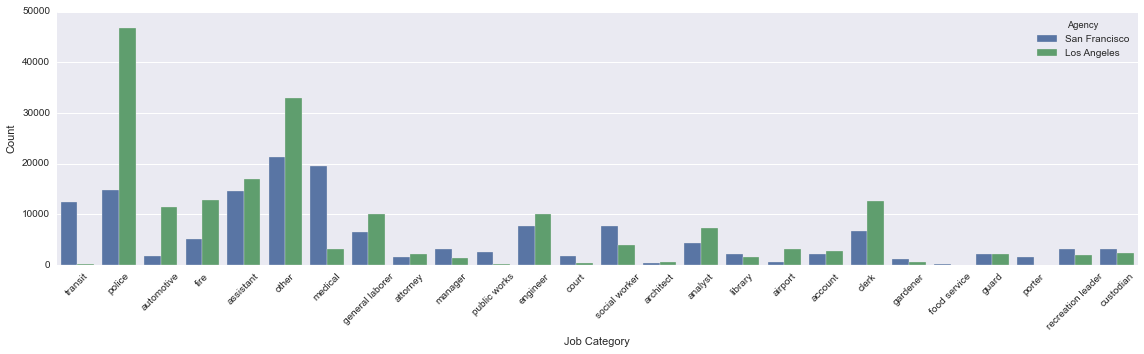

In [10]:
plt.figure(figsize=(16,5))
sns.countplot('CombJobTitle', data = dat, hue = 'Agency')
plt.xticks(rotation = 45)
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig("job_compare.png")

It's very interesting that the number of employees in police category in LA is almost 3 times that of SF. Does this mean LA is a more dangerous place to live compared to SF? According to California Department of Justice's record in 2013 (https://en.wikipedia.org/wiki/California_locations_by_crime_rate), the violent crime rates per 1,000 persons of LA and SF are 5.59 and 7.56 respectively, and the property crime rates per 1,000 persons of LA and SF are 15.90 and 13.96. They are pretty close. Then I realized that the population in LA is about 12 times larger than SF and things became reasonable. Many people work in transit field in SF and very few people in LA are in this field although LA has a much larger population. This is because SF has a much better public transportation system and people there almost do not need to drive. The public transportation system can create many positions in SF. Another interesting finding is there are much more people working in medical field in SF than LA given the fact that LA has a much larger population. 